In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import seaborn as sns
import scipy.stats as ss
from sklearn.preprocessing import minmax_scale 
import re
import warnings
warnings.filterwarnings('ignore')
import sweetviz as sv
sns.set(style="darkgrid")
pd.options.display.show_dimensions=False
pd.options.display.width = 80
pd.options.display.max_colwidth = 10
pd.options.display.max_columns = 80
pd.set_option('display.max_rows',None)

Citation:
juntarawijit, chudchawal (2014-2017). Pesticide and lung cancer. figshare. Dataset. https://doi.org/10.6084/m9.figshare.12356270.v5

Data was analyzed prior to this analysis and presented in research paper: Pesticide exposure and lung cancer risk: A case-control study in Nakhon Sawan, Thailand : Teera Kangkhetkron and Chudchawal Juntarawijit (2020)

The dataset contains 68 columns which record responses of participants in Nakhon Sawan province, Thailand by in-person questionaire. 233 lung cancer cases, and 458 healthy neighbours matched for gender, and age (±5 years) were questioned about pesticides and other types of environmental exposures.  Demographic data, distance to nearest farm land, air pollution exposures, cigarette smoking habits were collected. Many of the features were recorded in multiple forms such as yes or no, number of days, total per year, etc.                                                          Many cells were left empty when the field is a quantity following a no exposure response. 
 
Cigarette smoking was recorded in 5 different columns.  Here we will look at Cigarette_number and CigSmoke_status.                                                 
For full descriptions refer to the Data Dictionary: https://figshare.com/articles/dataset/Pesticide_and_lung_cancer/12356270/5?file=39615298

Target: ID:  Float data. .0 as control, no lung cancer and .(1-9) as lung cancer

LungCA: Lung cancer status of responders: 0  as control and 1 as having lung cancer

Cigarette_number: the number of cigarettes smoked per day

CigSmoke_status: Tobacco status of responders, 1 refers those who have never smoked a cigarette, 2 refers to ex-smoker, 3 refers to
current smoker

age_group: Responders in each group; 
1 refers to those with age less than or equal to 54, 
2 refer to those with age 55-64 yr, 
3 refer to those with age 65-74 yr, 
4 refer to those with age 75 yr or more


Problem statement:   Lung cancer has long been a cause of human mortality with cigarette smoking being a known contributor. Airborne envirnomental exposures are a daily occurrence across the globe, such as, exhaust from industry and vehicles, vapors from cooking and cleaning or the use of pesticides, fungicides and herbicides across farmlands. The goal of this analysis is to determine if other environmental exposures increase the incident lung cancers. 

In [2]:
lung_cancer = pd.read_csv('https://raw.githubusercontent.com/catorchid/ds-tools-project/main/Dataset%20pesticide%20and%20lung%20cancer.csv')
lung_cancer.sample(5)

,ID,LungCA,Gender,age,age_group,status,education,Occupation,Residency,Distances,Cooking_fumes,Air_Pollution_Exposure,CigSmoke1,CigSmoke2,Cigarette_total,Cigarette_year,Cigarette_number,CigSmoke_status,Herbicides,Herbicides_year,Herbicide_year_group,Herbicide_day,Number_Days_Herbicides_Use_Quartile_431,Insecticides_Use_432,Number_Years_Insecticides_Use_432,Number_Years_Insecticides_Use_Group_432,Number_Days_Insecticides_Use_432,Number_Days_Insecticides_Use_Quartile_432,Fungicides_Use_433,Number_Years_Fungticides_Use_433,Number_Years_Fungicides_Use_Group_433,Number_Days_Fungicides_Use_433,Number_Days_Fungicides_Use_Quartile_433,Glyphosate_use,Glyphosate_days,Paraquat_use,Paraquat_days,two_four_Dichlorophenoxy_use,two_four_Dichlorophenoxy_days,Butachlor_use,Butachlor_Days,Propanil_use,Propanil_days,Alachlor_use,Alachlor_days,Endosalfan_use,Endosalfan_days,Dieldrin_use,Dieldrin_days,DDT_use,DDT_days,Chlorpylifos_use,Chlorpylifos_days,Folidol_use,Folidol_days,Mevinphos_use,Mevinphos_days,Carbaryl_Savins_use,Carbaryl_Savins_days,Carbofuran_use,Carbofuran_days,Abamectin_use,Abamectin_days,Armure_Propiconazole_use,Armure_Propiconazole_days,Metal_aldehyde_use,Metal_aldehyde_days,Morphology_Group
55,19.1,0,0,62,2,2,1,2,1,1,2,0,1,0,0,0,0,1,0,,,,,0,,,,,0,,,,,1,32,1,40,0,0,1,60,0,0,1,16,0,0,0,,0,,0,,0,,0,,0,,0,,0,,0,,0,,0
246,83.0,1,1,72,3,2,1,1,3,2,1,1,0,1,182500,50,10,3,1,50,3,1200,4,1,50,3,820,3,0,,,,,1,80,1,80,1,80,1,20,1,20,1,20,0,0,0,,0,,1,160,0,,0,,0,,1,48,0,,0,,0,,2
234,79.0,1,1,76,4,2,1,2,3,1,1,1,0,1,328500,30,30,2,1,30,2,5460,4,1,30,2,5460,4,1,30,2,5250,4,1,144,1,144,0,0,0,0,0,0,0,0,1,5460,0,,0,,0,,0,,0,,0,,0,,1,5460,0,,0,,4
61,21.1,0,1,79,4,3,1,1,3,1,2,0,0,2,54750,30,5,2,0,,,,,0,,,,,0,,,,,1,1600,1,1600,0,0,0,0,0,0,0,0,0,0,0,,0,,0,,0,,0,,0,,0,,0,,0,,0,,0
281,94.2,0,0,48,1,2,1,1,3,2,2,1,0,1,131400,36,10,2,1,15,2,420,2,1,15,2,,,0,,,,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,,0,,0,,0,,0,,0,,0,,0,,0,,0,,0


In [3]:
lung_cancer.isnull().sum()

ID                                           0
LungCA                                       0
Gender                                       0
age                                          0
age_group                                    0
status                                       0
education                                    0
Occupation                                   0
Residency                                    0
Distances                                    0
Cooking_fumes                                0
Air_Pollution_Exposure                       0
CigSmoke1                                    0
CigSmoke2                                    0
Cigarette_total                              0
Cigarette_year                               0
Cigarette_number                             0
CigSmoke_status                              0
Herbicides                                   0
Herbicides_year                              0
Herbicide_year_group                         0
Herbicide_day

In [4]:
lung_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 68 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         680 non-null    float64
 1   LungCA                                     680 non-null    int64  
 2   Gender                                     680 non-null    int64  
 3   age                                        680 non-null    int64  
 4   age_group                                  680 non-null    int64  
 5   status                                     680 non-null    int64  
 6   education                                  680 non-null    int64  
 7   Occupation                                 680 non-null    int64  
 8   Residency                                  680 non-null    int64  
 9   Distances                                  680 non-null    int64  
 10  Cooking_fumes             

Although isna returns 0 for all columns, there are empty cells. Regex to replace empty cells with 0. All empty cells refer to a quantity where the reponse to exposure is no.  We can safely apply 0 here as it follows there would be no # of cigarettes smoked or days in which an exposure occurred. 

In [5]:
lung_cancer = lung_cancer.replace(r'^\s*$', 0, regex=True)
lung_cancer.sample(5)

,ID,LungCA,Gender,age,age_group,status,education,Occupation,Residency,Distances,Cooking_fumes,Air_Pollution_Exposure,CigSmoke1,CigSmoke2,Cigarette_total,Cigarette_year,Cigarette_number,CigSmoke_status,Herbicides,Herbicides_year,Herbicide_year_group,Herbicide_day,Number_Days_Herbicides_Use_Quartile_431,Insecticides_Use_432,Number_Years_Insecticides_Use_432,Number_Years_Insecticides_Use_Group_432,Number_Days_Insecticides_Use_432,Number_Days_Insecticides_Use_Quartile_432,Fungicides_Use_433,Number_Years_Fungticides_Use_433,Number_Years_Fungicides_Use_Group_433,Number_Days_Fungicides_Use_433,Number_Days_Fungicides_Use_Quartile_433,Glyphosate_use,Glyphosate_days,Paraquat_use,Paraquat_days,two_four_Dichlorophenoxy_use,two_four_Dichlorophenoxy_days,Butachlor_use,Butachlor_Days,Propanil_use,Propanil_days,Alachlor_use,Alachlor_days,Endosalfan_use,Endosalfan_days,Dieldrin_use,Dieldrin_days,DDT_use,DDT_days,Chlorpylifos_use,Chlorpylifos_days,Folidol_use,Folidol_days,Mevinphos_use,Mevinphos_days,Carbaryl_Savins_use,Carbaryl_Savins_days,Carbofuran_use,Carbofuran_days,Abamectin_use,Abamectin_days,Armure_Propiconazole_use,Armure_Propiconazole_days,Metal_aldehyde_use,Metal_aldehyde_days,Morphology_Group
298,100.1,0,1,69,3,2,1,1,2,2,2,0,0,2,18250,5,10,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
46,16.1,0,1,67,3,3,1,1,3,1,2,1,1,0,0,0,0,1,1,30,2,360,2,1,2,1,10,1,1,30,2,360,3,1,1024,1,1024,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
422,152.0,1,1,65,3,3,1,2,3,2,1,1,1,0,0,0,0,1,1,15,2,540,3,1,40,3,900,4,0,0,0,0,0,1,1600,1,1600,0,0,0,0,0,0,0,0,1,160,0,0,0,0,0,0,1,350,0,0,0,0,1,1920,0,0,0,0,0,0,3
577,232.2,0,0,60,2,3,1,1,3,3,1,1,1,0,0,0,0,1,0,0,0,0,0,1,25,2,830,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,200,0,0,0,0,0,0,0,0,0,0,0,0,1,630,0,0,0,0,0
531,200.1,0,1,56,2,2,1,1,3,3,2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,420,1,420,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<Axes: >

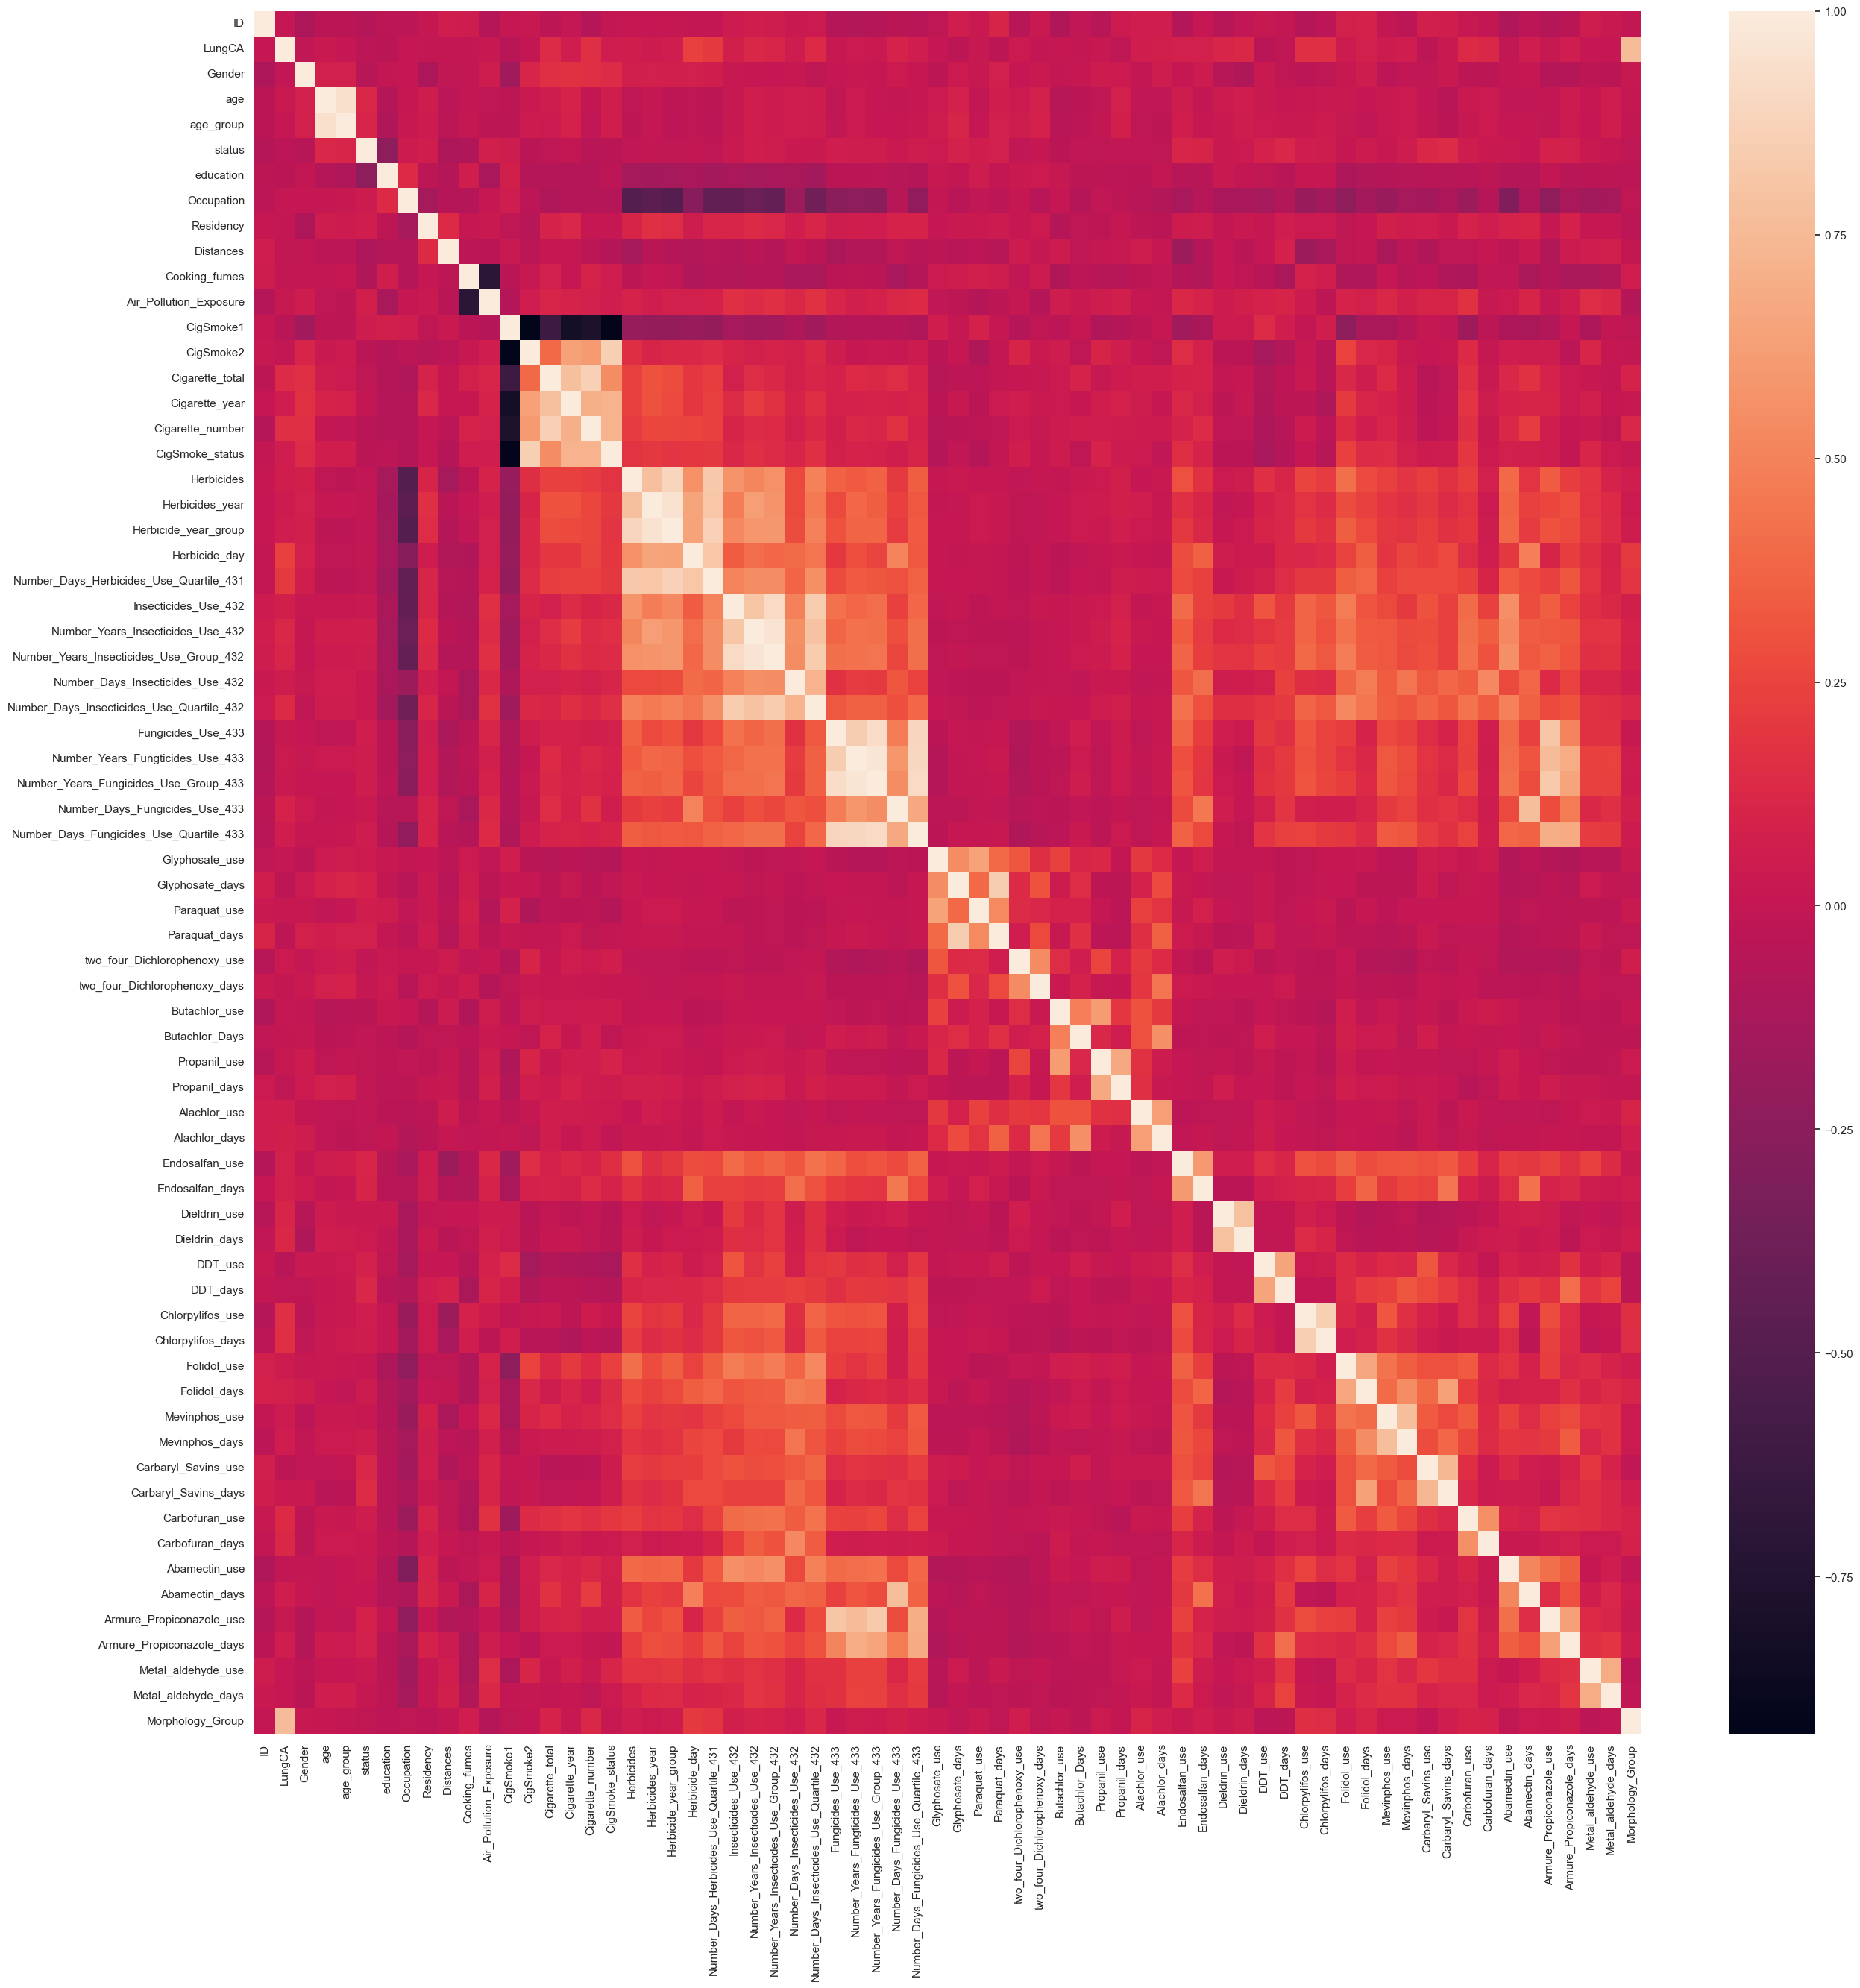

In [6]:
# heatmap containing all 68 features.  Not very useful but we can see some areas of high correlation do exist
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(30, 30))
coeff=lung_cancer.corr()
sns.heatmap(coeff)

In [7]:
lung_cancer.describe()

,ID,LungCA,Gender,age,age_group,status,education,Occupation,Residency,Distances,Cooking_fumes,Air_Pollution_Exposure,CigSmoke1,CigSmoke2,Cigarette_year,CigSmoke_status,Herbicides,Insecticides_Use_432,Fungicides_Use_433,Glyphosate_use,Glyphosate_days,Paraquat_use,Paraquat_days,two_four_Dichlorophenoxy_use,two_four_Dichlorophenoxy_days,Butachlor_use,Butachlor_Days,Propanil_use,Propanil_days,Alachlor_use,Alachlor_days,Endosalfan_use,Endosalfan_days,Dieldrin_use,DDT_use,Chlorpylifos_use,Folidol_use,Mevinphos_use,Carbaryl_Savins_use,Carbofuran_use,Abamectin_use,Armure_Propiconazole_use,Metal_aldehyde_use,Morphology_Group
count,680.00...,680.00...,680.00...,680.00...,680.00...,680.00...,680.00...,680.00...,680.00...,680.00...,680.00...,680.00...,680.00...,680.00...,680.00...,680.00...,680.00...,680.00...,680.00...,680.00...,680.00...,680.00...,680.00...,680.00...,680.00...,680.00...,680.00...,680.00...,680.00...,680.00...,680.00...,680.00...,680.00...,680.00...,680.00...,680.00...,680.00...,680.00...,680.00...,680.00...,680.00...,680.00...,680.00...,680.00...
mean,127.80...,0.342647,0.589706,65.600000,2.627941,2.069118,1.101471,1.436765,2.650000,1.994118,1.679412,0.485294,0.650000,0.529412,10.352941,1.448529,0.510294,0.448529,0.170588,0.413235,300.29...,0.354412,229.48...,0.170588,73.364706,0.055882,14.964706,0.047059,8.917647,0.063235,39.944118,0.116176,71.850000,0.064706,0.073529,0.102941,0.152941,0.055882,0.070588,0.125000,0.197059,0.117647,0.063235,0.898529
std,83.800673,0.474944,0.492249,10.794724,1.002845,0.440497,0.338929,0.496350,0.658802,0.935297,0.467046,0.500152,0.477321,0.780291,17.160135,0.667131,0.500262,0.497710,0.376426,0.492777,654.43...,0.478687,582.35...,0.376426,301.64...,0.229863,126.74...,0.211921,60.095302,0.243565,249.02...,0.320672,333.85...,0.246187,0.261196,0.304106,0.360196,0.229863,0.256324,0.330962,0.398070,0.322427,0.243565,1.632692
min,1.000000,0.000000,0.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,57.175000,0.000000,0.000000,58.000000,2.000000,2.000000,1.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,114.15...,0.000000,1.000000,66.000000,3.000000,2.000000,1.000000,1.000000,3.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,189.02...,1.000000,1.000000,74.000000,3.000000,2.000000,1.000000,2.000000,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000,15.250000,2.000000,1.000000,1.000000,0.000000,1.000000,338.00...,1.000000,160.00...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,292.20...,1.000000,1.000000,98.000000,4.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,1.000000,1.000000,2.000000,70.000000,3.000000,1.000000,1.000000,1.000000,1.000000,5760.0...,1.000000,5760.0...,1.000000,3600.0...,1.000000,1920.0...,1.000000,660.00...,1.000000,3600.0...,1.000000,5460.0...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000


In [8]:
# New df containing columns of interest
lung_cancer_trunc = lung_cancer[['LungCA','age','age_group','CigSmoke_status','Cigarette_total','Cooking_fumes',
'Air_Pollution_Exposure','Herbicide_day','Herbicides_year','Number_Days_Insecticides_Use_432','Number_Years_Insecticides_Use_Group_432',
'Number_Days_Fungicides_Use_433','Number_Years_Fungticides_Use_433','Glyphosate_days','Paraquat_days','two_four_Dichlorophenoxy_days',
'Butachlor_Days','Propanil_days','Alachlor_days','Endosalfan_days','Dieldrin_days','DDT_days','Chlorpylifos_days','Folidol_days',
'Mevinphos_days','Carbaryl_Savins_days','Carbofuran_days','Abamectin_days','Armure_Propiconazole_days','Metal_aldehyde_days']]

In [9]:
lung_cancer_trunc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   LungCA                                   680 non-null    int64 
 1   age                                      680 non-null    int64 
 2   age_group                                680 non-null    int64 
 3   CigSmoke_status                          680 non-null    int64 
 4   Cigarette_total                          680 non-null    object
 5   Cooking_fumes                            680 non-null    int64 
 6   Air_Pollution_Exposure                   680 non-null    int64 
 7   Herbicide_day                            680 non-null    object
 8   Herbicides_year                          680 non-null    object
 9   Number_Days_Insecticides_Use_432         680 non-null    object
 10  Number_Years_Insecticides_Use_Group_432  680 non-null    objec

In [10]:
#### lung_cancer_trunc.drop(['ID'], axis=1, inplace = True)
lung_cancer_trunc=lung_cancer_trunc.astype(int)
lung_cancer_trunc['ID']=lung_cancer['ID']
lung_cancer_trunc['LungCA'] = lung_cancer_trunc['LungCA'].map({1: 'Yes', 0: 'No'})
lung_cancer_trunc['CigSmoke_status'] = lung_cancer_trunc['CigSmoke_status'].map({1: 'Never', 2: 'Quit', 3: 'Current'})
lung_cancer_trunc['Lung Cancer'] = lung_cancer_trunc['LungCA']

In [11]:
lung_cancer_trunc.sample(10)

,LungCA,age,age_group,CigSmoke_status,Cigarette_total,Cooking_fumes,Air_Pollution_Exposure,Herbicide_day,Herbicides_year,Number_Days_Insecticides_Use_432,Number_Years_Insecticides_Use_Group_432,Number_Days_Fungicides_Use_433,Number_Years_Fungticides_Use_433,Glyphosate_days,Paraquat_days,two_four_Dichlorophenoxy_days,Butachlor_Days,Propanil_days,Alachlor_days,Endosalfan_days,Dieldrin_days,DDT_days,Chlorpylifos_days,Folidol_days,Mevinphos_days,Carbaryl_Savins_days,Carbofuran_days,Abamectin_days,Armure_Propiconazole_days,Metal_aldehyde_days,ID,Lung Cancer
64,No,60,2,Never,0,2,0,0,0,0,0,0,0,68,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22.1,No
144,Yes,64,2,Quit,657000,2,1,660,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49.0,Yes
480,Yes,72,3,Current,365000,2,1,100,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,177.0,Yes
97,No,67,3,Current,36500,2,1,168,7,570,2,0,0,600,0,200,0,0,0,0,0,0,252,60,7,0,0,252,0,0,33.1,No
30,Yes,58,2,Never,0,2,0,720,20,280,2,320,20,0,0,0,0,0,0,0,0,0,960,130,960,0,0,0,320,0,11.0,Yes
198,Yes,54,1,Quit,138700,1,1,720,20,240,2,0,0,640,640,0,0,0,0,480,0,0,0,139,0,0,0,480,0,0,67.0,Yes
433,Yes,59,2,Current,36500,2,0,1200,10,1170,2,0,0,0,0,0,0,0,0,1200,0,0,0,1200,0,1200,1080,0,0,0,156.0,Yes
210,Yes,58,2,Never,0,1,1,960,20,960,2,0,0,0,0,0,0,0,0,0,960,0,0,0,0,0,0,0,0,0,71.0,Yes
230,No,69,3,Current,328500,2,1,320,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,77.2,No
502,No,49,1,Never,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,185.1,No


In [12]:
lung_cancer_trunc.dtypes

LungCA                                      object
age                                          int32
age_group                                    int32
CigSmoke_status                             object
Cigarette_total                              int32
Cooking_fumes                                int32
Air_Pollution_Exposure                       int32
Herbicide_day                                int32
Herbicides_year                              int32
Number_Days_Insecticides_Use_432             int32
Number_Years_Insecticides_Use_Group_432      int32
Number_Days_Fungicides_Use_433               int32
Number_Years_Fungticides_Use_433             int32
Glyphosate_days                              int32
Paraquat_days                                int32
two_four_Dichlorophenoxy_days                int32
Butachlor_Days                               int32
Propanil_days                                int32
Alachlor_days                                int32
Endosalfan_days                

Contribution of cigarette smoking to lung cancer development by age group.   As the average number of cigarettes smoked per day increases, so does the number of lung cancer cases. There is a correlation between increased smoking and lung cancer.  Age may also be a factor but further investigation would be needed. 

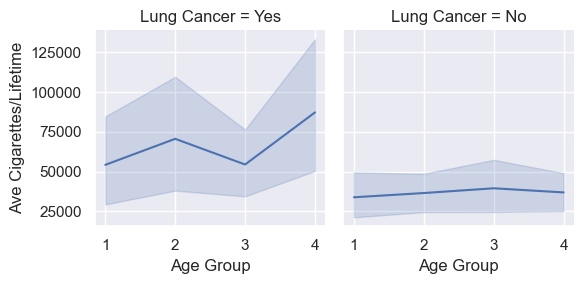

In [13]:


palette = sns.cubehelix_palette(light=.6, n_colors=2)
g = sns.relplot(
    data=lung_cancer_trunc, kind="line",
    x="age_group", y="Cigarette_total", 
    palette=palette, height=3,
    col='Lung Cancer'
)

g.set_axis_labels("Age Group", "Ave Cigarettes/Lifetime")




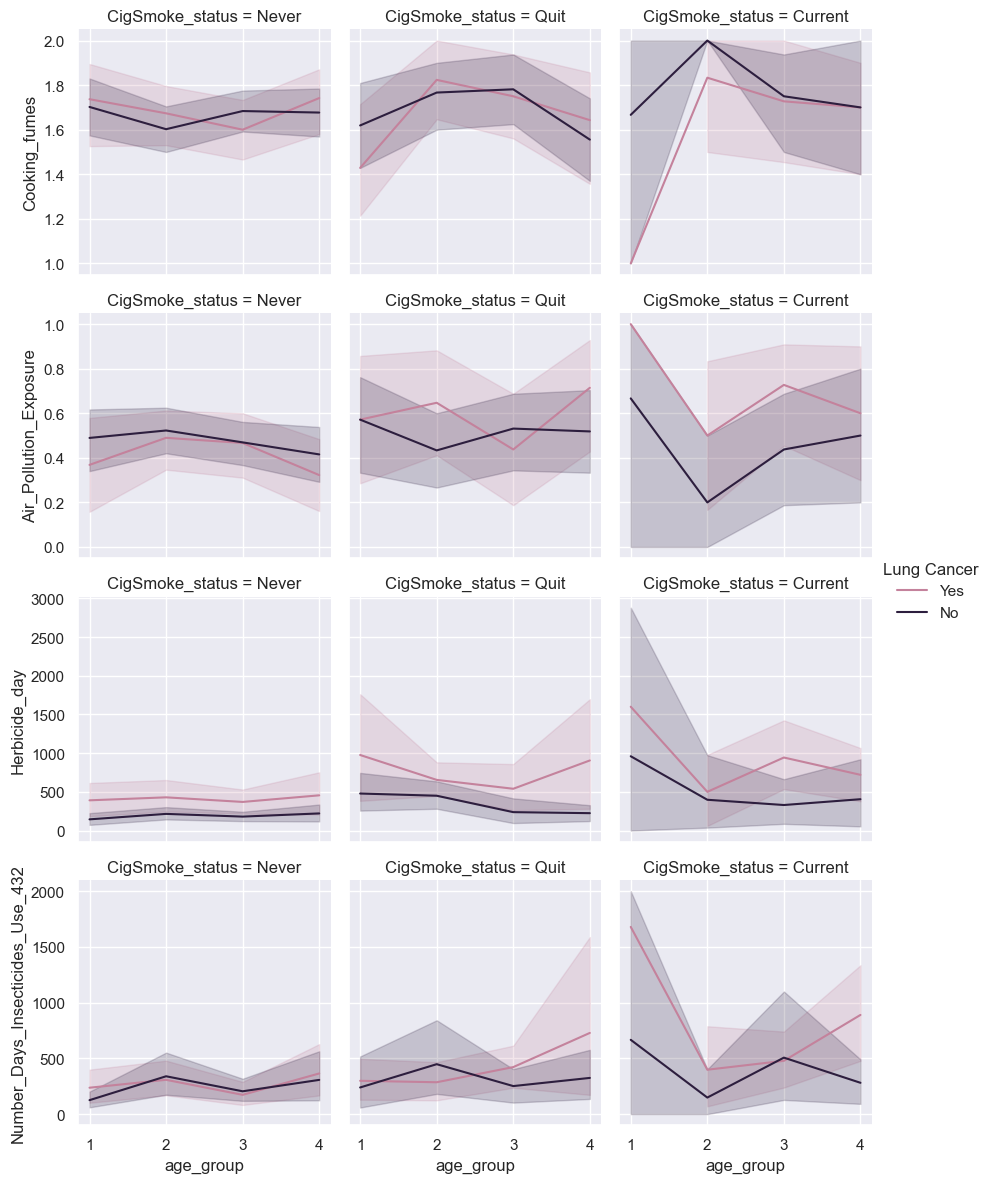

In [14]:
# melt the dataframe so all the "Y Val Row *" values are in the same column
dfmelt1 = pd.melt(lung_cancer_trunc, id_vars=['age_group', 'CigSmoke_status', 'Cigarette_total','Lung Cancer'], 
                     value_vars=['Cooking_fumes', 'Air_Pollution_Exposure', 'Herbicide_day',
                     'Number_Days_Insecticides_Use_432'],
                     var_name="variable", value_name="value")

# make the relplot, limiting the sharey flag to each row
gm = sns.relplot(data=dfmelt1, row="variable", y="value", x="age_group", 
                 col="CigSmoke_status", hue="Lung Cancer", kind="line",
                 palette=palette, height=3,facet_kws={"sharey":"row"})

# pull the "Y Val Row *" label from each graph title onto the row y label
# this assumes the current default behavior seaborn.relplot for graph titling
for row in gm.axes:
    for ax in row:
        title = ax.title.get_text()
        ax.set_title(title.split(" | ")[1])
    row[0].set_ylabel(title.split(" | ")[0].replace("variable = ", ""))

Observations: Air pollutions appears to be a contributing factor to lung cancer when coupled with cigarette smoking.  As general terms, herbicides appear to be a lung cancer risk across all groups and ages.  Insecticides may increase the risk for smokers. Thankfully, cooking fumes do not appear to cause any additional risk.  We won't need to resort to raw eggs in our milk and uncooked veggies. 

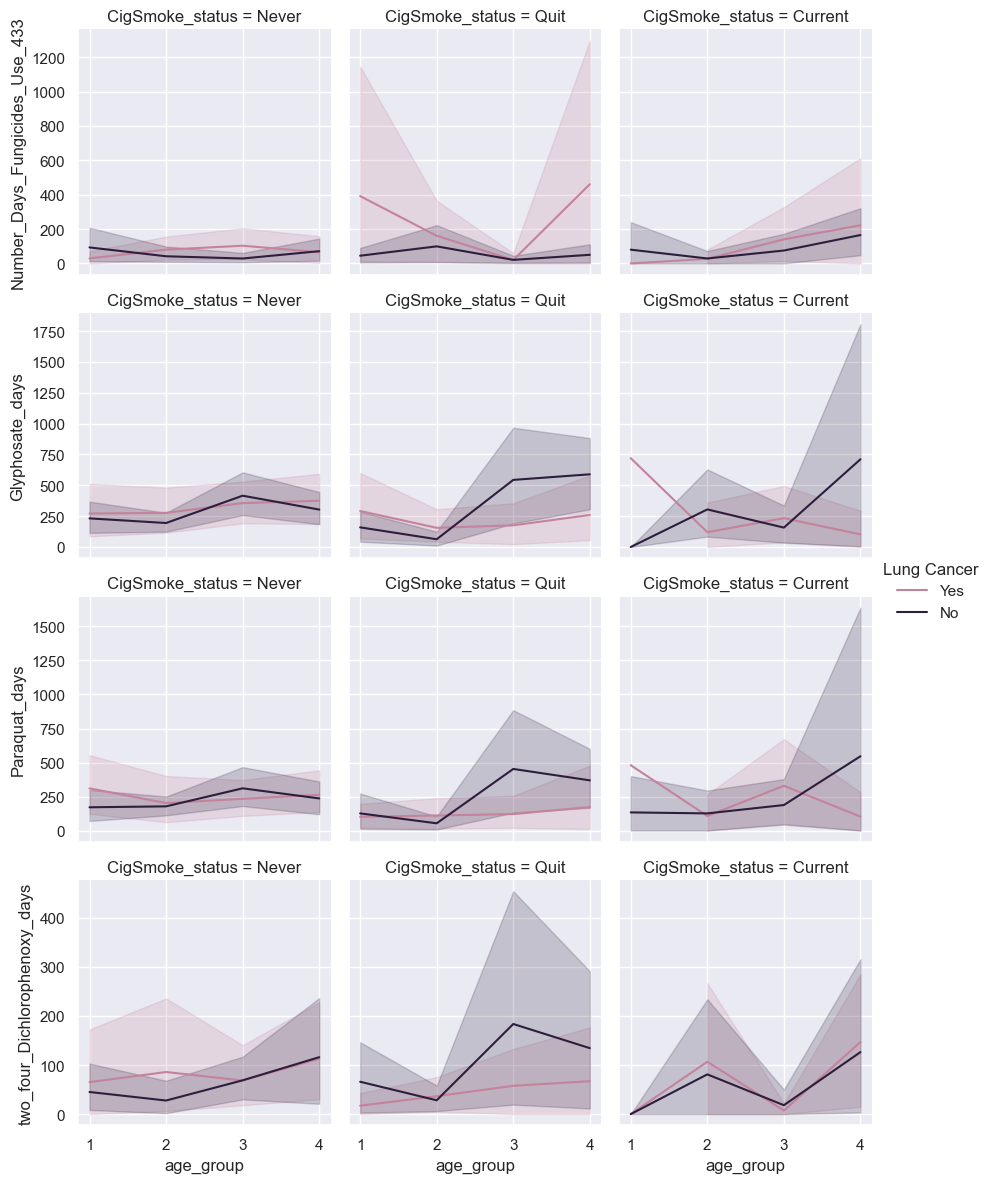

In [15]:
dfmelt2 = pd.melt(lung_cancer_trunc, id_vars=['age_group', 'CigSmoke_status', 'Cigarette_total', 'Lung Cancer'], 
                     value_vars=['Number_Days_Fungicides_Use_433',
                     'Glyphosate_days','Paraquat_days','two_four_Dichlorophenoxy_days'],
                     var_name="variable", value_name="value")
gm2 = sns.relplot(data=dfmelt2, row="variable", y="value", x="age_group", 
                 col="CigSmoke_status", hue="Lung Cancer", kind="line",
                 palette=palette, height=3,facet_kws={"sharey":"row"})
for row in gm2.axes:
    for ax in row:
        title = ax.title.get_text()
        ax.set_title(title.split(" | ")[1])
    row[0].set_ylabel(title.split(" | ")[0].replace("variable = ", ""))

Observations: Largely inconclusive but the general fungicide catagory may increase risk of lung cancer. 

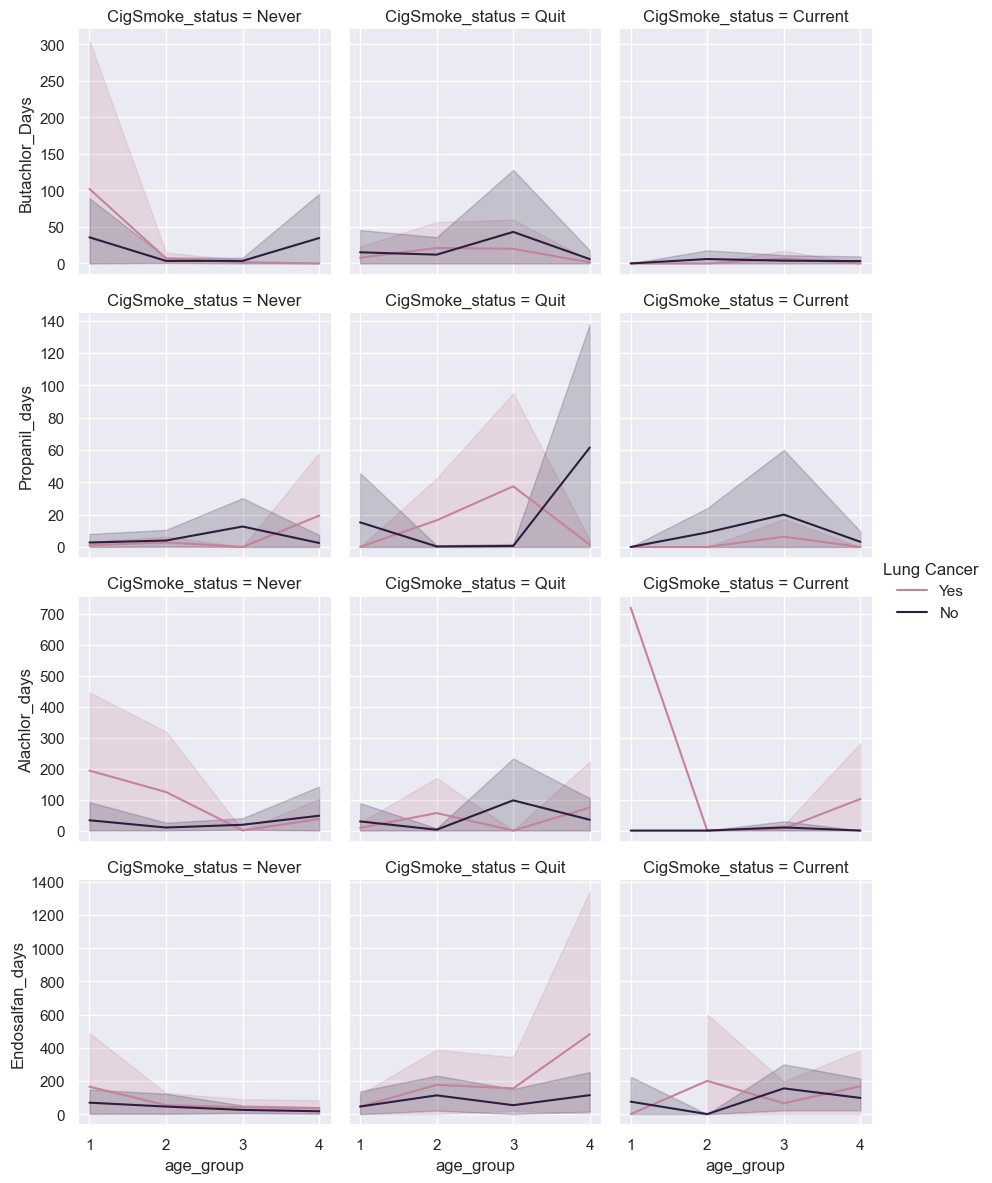

In [16]:
dfmelt3 = pd.melt(lung_cancer_trunc, id_vars=['age_group', 'CigSmoke_status','Cigarette_total', 'Lung Cancer'], 
                     value_vars=['Butachlor_Days','Propanil_days','Alachlor_days','Endosalfan_days'],
                     var_name="variable", value_name="value")
gm3 = sns.relplot(data=dfmelt3, row="variable", y="value", x="age_group", 
                 col="CigSmoke_status", hue="Lung Cancer", kind="line",
                 palette=palette, height=3,facet_kws={"sharey":"row"})
for row in gm3.axes:
    for ax in row:
        title = ax.title.get_text()
        ax.set_title(title.split(" | ")[1])
    row[0].set_ylabel(title.split(" | ")[0].replace("variable = ", ""))

Observations: Alachlor and Endosalfan might increase risk. 

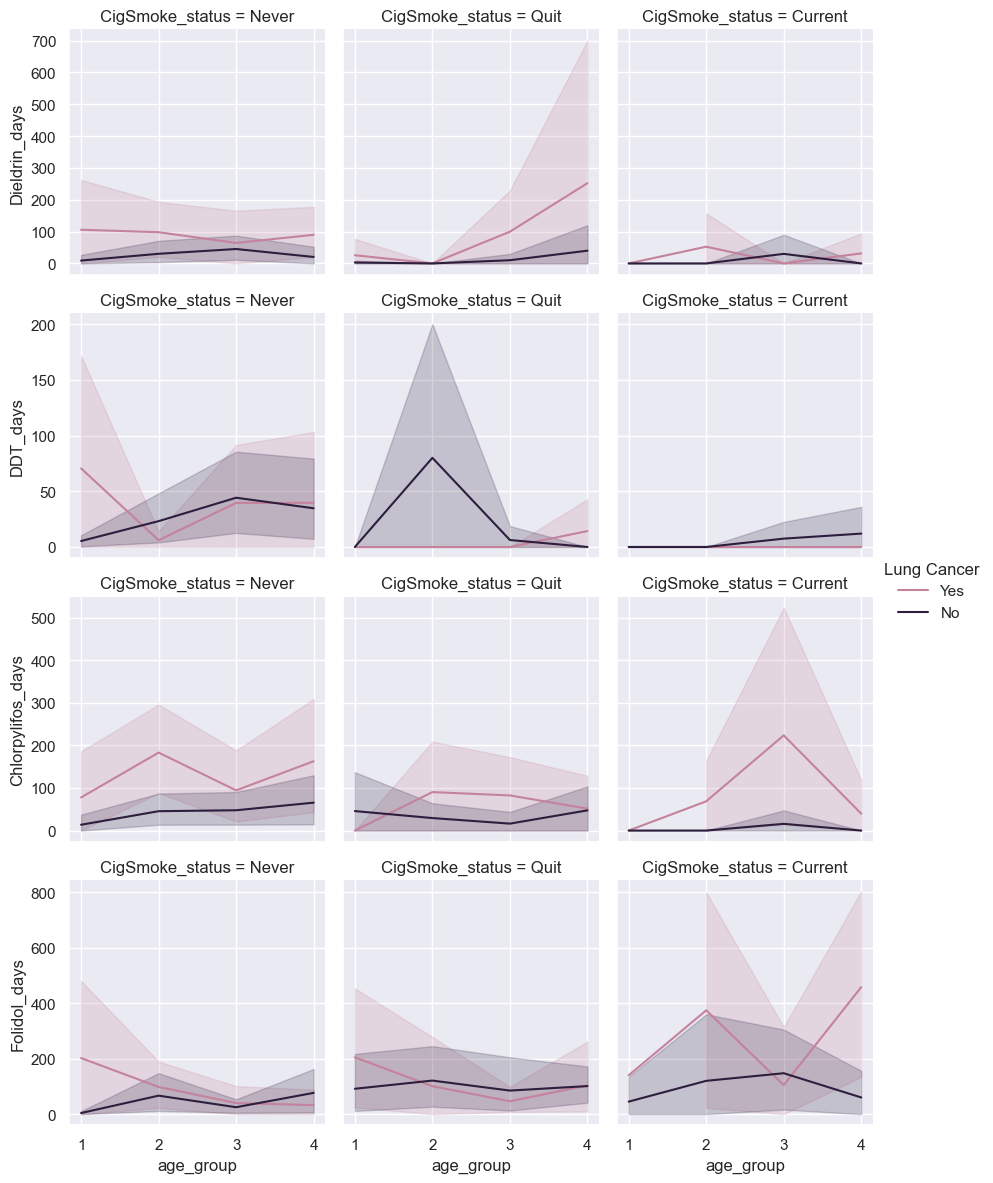

In [17]:
dfmelt4 = pd.melt(lung_cancer_trunc, id_vars=['age_group', 'CigSmoke_status', 'Cigarette_total','Lung Cancer'], 
                     value_vars=['Dieldrin_days','DDT_days','Chlorpylifos_days','Folidol_days'],
                     var_name="variable", value_name="value")
gm4 = sns.relplot(data=dfmelt4, row="variable", y="value", x="age_group", 
                 col="CigSmoke_status", hue="Lung Cancer", kind="line",
                 palette=palette, height=3,facet_kws={"sharey":"row"})
for row in gm4.axes:
    for ax in row:
        title = ax.title.get_text()
        ax.set_title(title.split(" | ")[1])
    row[0].set_ylabel(title.split(" | ")[0].replace("variable = ", ""))

Observations: Dieldrin, and Chlorpylifos appear to increase lung cancer risk.  Foidol is a possible risk. 

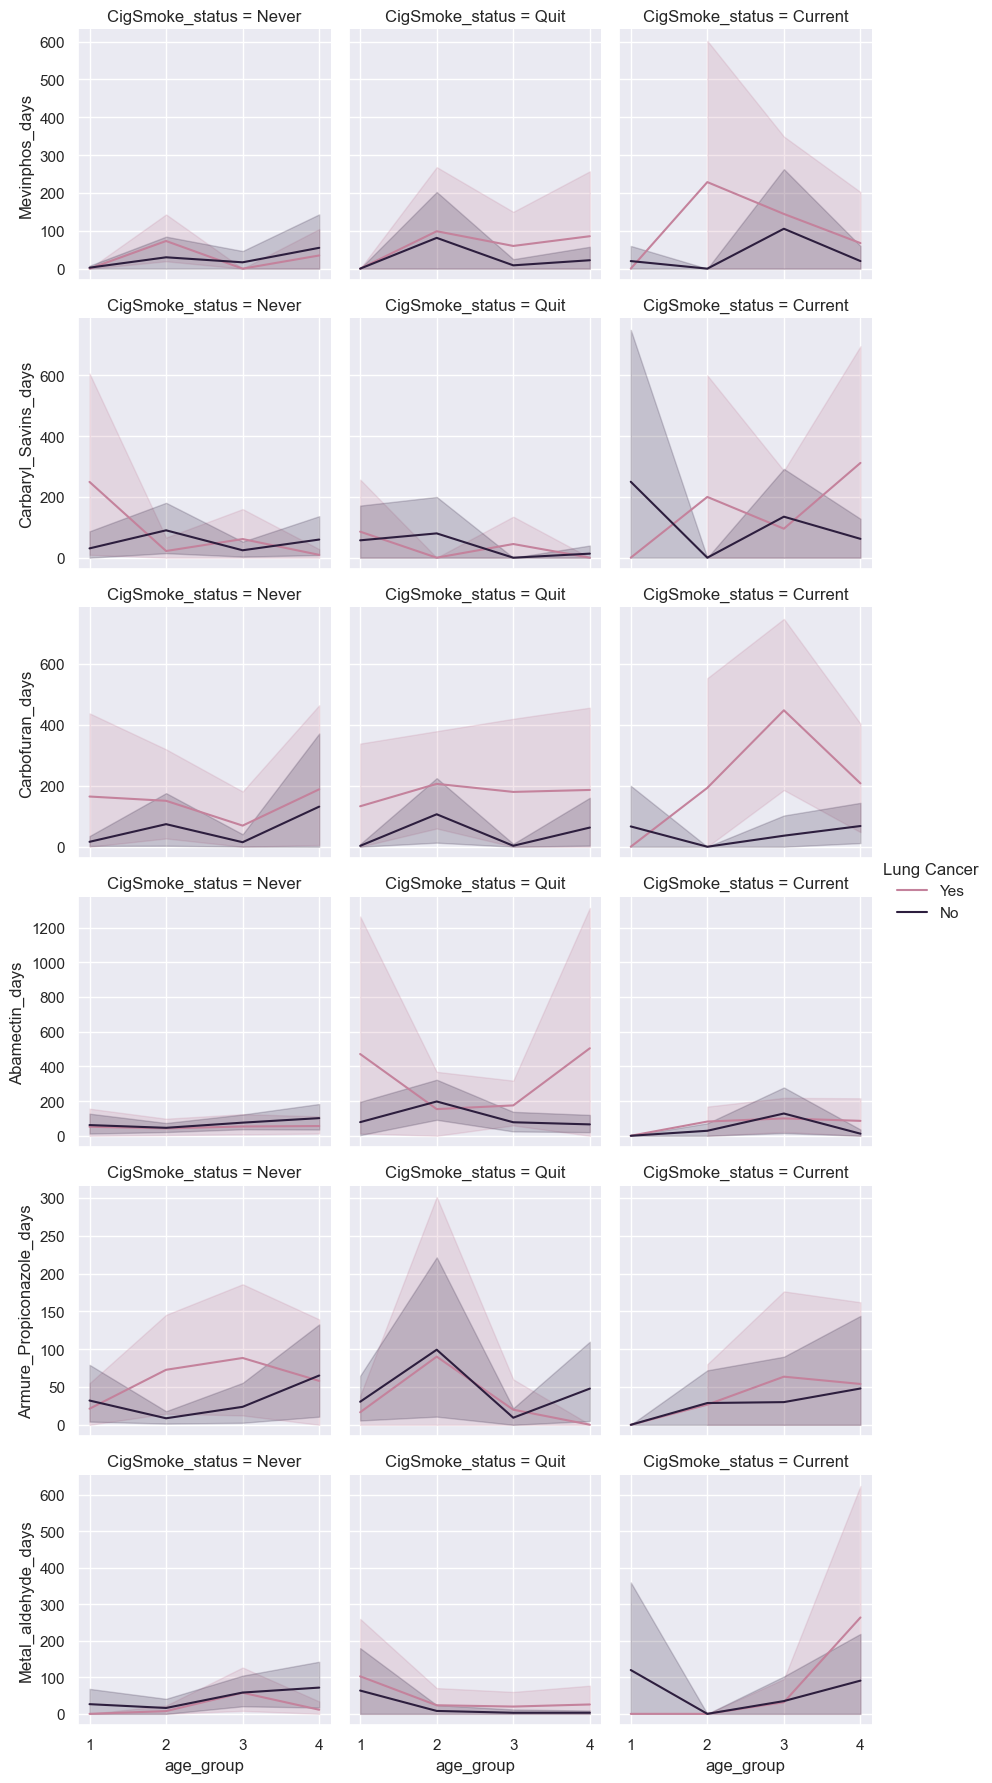

In [18]:
dfmelt5 = pd.melt(lung_cancer_trunc, id_vars=['age_group', 'CigSmoke_status','Cigarette_total', 'Lung Cancer'], 
                     value_vars=['Mevinphos_days','Carbaryl_Savins_days','Carbofuran_days','Abamectin_days',
                     'Armure_Propiconazole_days','Metal_aldehyde_days'],
                     var_name="variable", value_name="value")
gm5 = sns.relplot(data=dfmelt5, row="variable", y="value", x="age_group", 
                 col="CigSmoke_status", hue="Lung Cancer", kind="line",
                 palette=palette, height=3,facet_kws={"sharey":"row"})
for row in gm5.axes:
    for ax in row:
        title = ax.title.get_text()
        ax.set_title(title.split(" | ")[1])
    row[0].set_ylabel(title.split(" | ")[0].replace("variable = ", ""))

Observations: Carbofuran (insecticide used world-wide on crops) and Mevinphos (insecticide used mainly on vegetables) both appear strongly correlated. The other 4 may be risk factors when combined with smoking and/or age. 

create a new column for total_exposures which contains the sum of all exposures excluding cigarettes

In [19]:
lung_cancer_trunc['Total_exposures'] = (lung_cancer_trunc['Herbicide_day']*lung_cancer_trunc['Herbicides_year'])+(lung_cancer_trunc['Number_Days_Insecticides_Use_432']*lung_cancer_trunc['Number_Years_Insecticides_Use_Group_432'])+(lung_cancer_trunc['Number_Days_Fungicides_Use_433']*lung_cancer_trunc['Number_Years_Fungticides_Use_433'])
lung_cancer_trunc.sample(5)

,LungCA,age,age_group,CigSmoke_status,Cigarette_total,Cooking_fumes,Air_Pollution_Exposure,Herbicide_day,Herbicides_year,Number_Days_Insecticides_Use_432,Number_Years_Insecticides_Use_Group_432,Number_Days_Fungicides_Use_433,Number_Years_Fungticides_Use_433,Glyphosate_days,Paraquat_days,two_four_Dichlorophenoxy_days,Butachlor_Days,Propanil_days,Alachlor_days,Endosalfan_days,Dieldrin_days,DDT_days,Chlorpylifos_days,Folidol_days,Mevinphos_days,Carbaryl_Savins_days,Carbofuran_days,Abamectin_days,Armure_Propiconazole_days,Metal_aldehyde_days,ID,Lung Cancer,Total_exposures
339,No,68,3,Never,0,2,0,20,10,300,2,20,10,960,960,0,0,0,0,860,0,0,840,0,0,0,0,20,20,0,114.1,No,1000
73,No,82,4,Never,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25.1,No,0
15,Yes,69,3,Never,0,1,1,1200,20,0,0,0,0,960,0,320,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.0,Yes,24000
499,No,61,2,Never,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,184.1,No,0
402,No,44,1,Never,0,2,0,480,20,260,2,120,20,0,0,0,0,0,0,840,0,80,560,0,0,60,0,60,120,0,139.1,No,12520


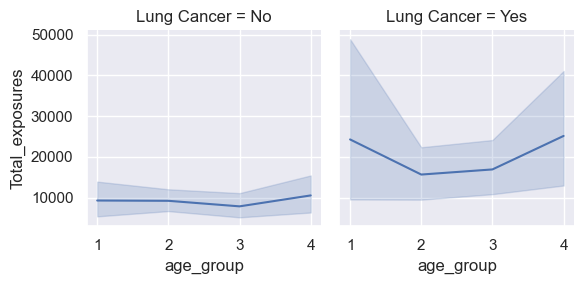

In [34]:
g = sns.relplot(
    data=lung_cancer_trunc, kind="line",
    x="age_group", y="Total_exposures", 
    palette=palette, height=3,
    col='Lung Cancer'
)

In [21]:
lung_cancer_trunc=pd.get_dummies(lung_cancer_trunc, columns=['CigSmoke_status'])
lung_cancer_trunc.sample(5)

,LungCA,age,age_group,Cigarette_total,Cooking_fumes,Air_Pollution_Exposure,Herbicide_day,Herbicides_year,Number_Days_Insecticides_Use_432,Number_Years_Insecticides_Use_Group_432,Number_Days_Fungicides_Use_433,Number_Years_Fungticides_Use_433,Glyphosate_days,Paraquat_days,two_four_Dichlorophenoxy_days,Butachlor_Days,Propanil_days,Alachlor_days,Endosalfan_days,Dieldrin_days,DDT_days,Chlorpylifos_days,Folidol_days,Mevinphos_days,Carbaryl_Savins_days,Carbofuran_days,Abamectin_days,Armure_Propiconazole_days,Metal_aldehyde_days,ID,Lung Cancer,Total_exposures,CigSmoke_status_Current,CigSmoke_status_Never,CigSmoke_status_Quit
593,Yes,84,4,0,2,0,256,8,190,1,0,0,840,840,840,0,0,840,0,0,128,0,288,0,288,180,0,0,0,255.0,Yes,2238,False,True,False
498,Yes,65,3,0,2,0,0,0,0,0,0,0,0,180,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,184.0,Yes,0,False,True,False
559,Yes,62,2,0,2,0,3600,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,220.0,Yes,144000,False,True,False
115,No,75,4,0,2,0,35,5,35,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,0,0,39.1,No,210,False,True,False
386,Yes,60,2,109500,2,0,0,0,0,0,0,0,720,720,120,120,120,0,0,0,0,0,0,0,0,0,0,0,0,133.0,Yes,0,False,False,True


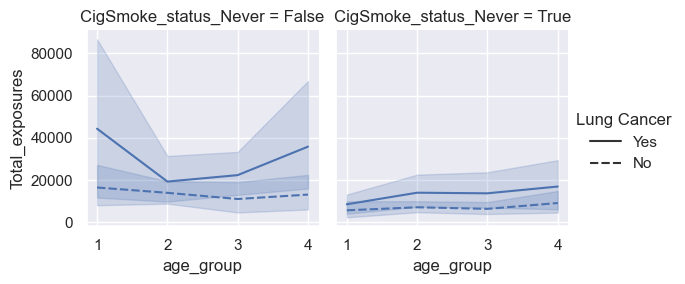

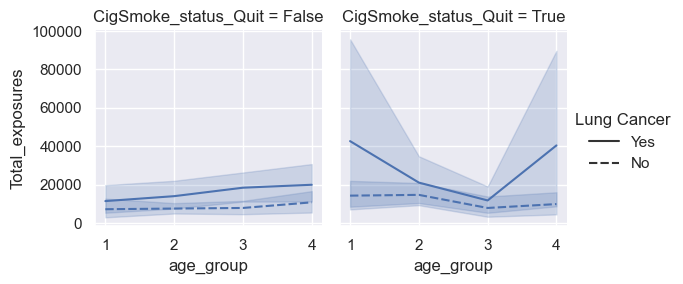

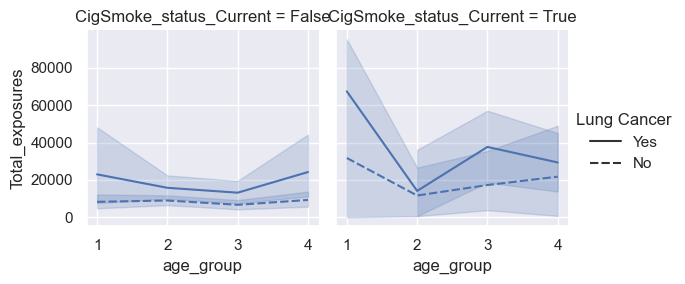

In [22]:
g = sns.relplot(
    data=lung_cancer_trunc, kind="line",
    x="age_group", y="Total_exposures", 
    palette=palette, height=3,
    col='CigSmoke_status_Never',style='Lung Cancer'
)
g = sns.relplot(
    data=lung_cancer_trunc, kind="line",
    x="age_group", y="Total_exposures", 
    palette=palette, height=3,
    col='CigSmoke_status_Quit',style='Lung Cancer'
)
g = sns.relplot(
    data=lung_cancer_trunc, kind="line",
    x="age_group", y="Total_exposures", 
    palette=palette, height=3,
    col='CigSmoke_status_Current',style='Lung Cancer'
)

In [23]:
import scipy.stats
scipy.stats.spearmanr(lung_cancer_trunc['Lung Cancer'], lung_cancer_trunc['CigSmoke_status_Never'])

SignificanceResult(statistic=-0.04839871711967859, pvalue=0.2074887175539296)

In [24]:
scipy.stats.spearmanr(lung_cancer_trunc['Lung Cancer'], lung_cancer_trunc['CigSmoke_status_Quit'])

SignificanceResult(statistic=0.01719333047841422, pvalue=0.6544740809244423)

In [25]:
scipy.stats.spearmanr(lung_cancer_trunc['Lung Cancer'], lung_cancer_trunc['CigSmoke_status_Current'])

SignificanceResult(statistic=0.05242858352345508, pvalue=0.1720663765884992)

In [26]:
scipy.stats.spearmanr(lung_cancer_trunc['Lung Cancer'], lung_cancer_trunc['Total_exposures'])

SignificanceResult(statistic=0.14156920288998381, pvalue=0.00021260352689352128)

In [27]:
scipy.stats.spearmanr(lung_cancer_trunc['Lung Cancer'], lung_cancer_trunc['Carbofuran_days'])

SignificanceResult(statistic=0.142542298547309, pvalue=0.00019203626445637946)

In [28]:
scipy.stats.spearmanr(lung_cancer_trunc['Lung Cancer'], lung_cancer_trunc['Chlorpylifos_days'])

SignificanceResult(statistic=0.16508915624391762, pvalue=1.5129066334868171e-05)

In [29]:
scipy.stats.spearmanr(lung_cancer_trunc['Lung Cancer'], lung_cancer_trunc['Cigarette_total'])

SignificanceResult(statistic=0.07566217423721208, pvalue=0.04858382893908292)

In [30]:
scipy.stats.spearmanr(lung_cancer_trunc['Lung Cancer'], lung_cancer['age_group'])

SignificanceResult(statistic=0.0035357464988359888, pvalue=0.9266728969288198)

create new column Cig_plus_exposures the sum of total cigarettes smoked and total_exposures

In [31]:
lung_cancer_trunc['Cig_plus_exposures'] = lung_cancer_trunc['Total_exposures']+lung_cancer_trunc['Cigarette_total']
lung_cancer_trunc.sort_values(by=['Cig_plus_exposures','age_group'], axis=0, ascending=True, inplace=True, ignore_index=True, key=None)
lung_cancer_trunc.head(10)

,LungCA,age,age_group,Cigarette_total,Cooking_fumes,Air_Pollution_Exposure,Herbicide_day,Herbicides_year,Number_Days_Insecticides_Use_432,Number_Years_Insecticides_Use_Group_432,Number_Days_Fungicides_Use_433,Number_Years_Fungticides_Use_433,Glyphosate_days,Paraquat_days,two_four_Dichlorophenoxy_days,Butachlor_Days,Propanil_days,Alachlor_days,Endosalfan_days,Dieldrin_days,DDT_days,Chlorpylifos_days,Folidol_days,Mevinphos_days,Carbaryl_Savins_days,Carbofuran_days,Abamectin_days,Armure_Propiconazole_days,Metal_aldehyde_days,ID,Lung Cancer,Total_exposures,CigSmoke_status_Current,CigSmoke_status_Never,CigSmoke_status_Quit,Cig_plus_exposures
0,No,50,1,0,2,0,0,0,0,0,0,0,80,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20.2,No,0,False,True,False,0
1,No,52,1,0,2,0,0,0,0,0,0,0,0,0,160,360,10,0,0,0,0,0,0,0,0,0,0,0,0,52.1,No,0,False,True,False,0
2,Yes,49,1,0,2,0,0,0,0,0,0,0,640,600,320,0,0,0,0,0,0,0,0,0,0,0,0,0,0,55.0,Yes,0,False,True,False,0
3,No,52,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,55.2,No,0,False,True,False,0
4,No,52,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,64.1,No,0,False,True,False,0
5,No,50,1,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,64.2,No,0,False,True,False,0
6,Yes,40,1,0,1,1,0,0,0,0,0,0,80,80,80,20,20,20,0,0,0,0,0,0,0,0,0,0,0,65.0,Yes,0,False,True,False,0
7,No,45,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,65.1,No,0,False,True,False,0
8,No,50,1,0,2,1,0,0,0,0,0,0,1200,1200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,720,72.1,No,0,False,True,False,0
9,No,42,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,74.2,No,0,False,True,False,0


<Axes: xlabel='Lung Cancer', ylabel='Cig_plus_exposures'>

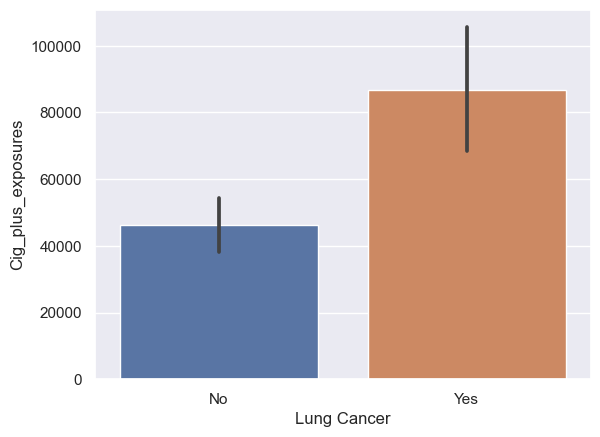

In [32]:
sns.barplot(lung_cancer_trunc, x='Lung Cancer', y='Cig_plus_exposures')


In [33]:
scipy.stats.spearmanr(lung_cancer_trunc['Cig_plus_exposures'], lung_cancer_trunc['Lung Cancer'])

SignificanceResult(statistic=0.11856238326372222, pvalue=0.0019550938054608055)